In [1]:
from csv import DictReader
from sklearn.model_selection import train_test_split
from ecnet.datasets import QSPRDataset

PROPERTY = "properties.flash_point.value"

with open("data/combustdb_master.csv", "r") as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

compounds_fp = [r for r in rows if r[PROPERTY] != "-"]

smiles = [c["canonical_smiles"] for c in compounds_fp]
prop = [[float(c[PROPERTY])] for c in compounds_fp]

smiles_fp_train, smiles_fp_test, prop_fp_train, prop_fp_test = train_test_split(smiles, prop, test_size=0.2, random_state=42)
ds_fp_train = QSPRDataset(smiles_fp_train, prop_fp_train, backend="alvadesc")
ds_fp_test = QSPRDataset(smiles_fp_test, prop_fp_test, backend="alvadesc")

In [2]:
PROPERTY = "properties.kinematic_viscosity.value"

with open("data/combustdb_master.csv", "r") as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

compounds_kv = [r for r in rows if r[PROPERTY] != "-"]

smiles = [c["canonical_smiles"] for c in compounds_kv]
prop = [[float(c[PROPERTY])] for c in compounds_kv]

smiles_kv_train, smiles_kv_test, prop_kv_train, prop_kv_test = train_test_split(smiles, prop, test_size=0.2, random_state=6)
ds_kv_train = QSPRDataset(smiles_kv_train, prop_kv_train, backend="alvadesc")
ds_kv_test = QSPRDataset(smiles_kv_test, prop_kv_test, backend="alvadesc")

In [3]:
from ecnet.datasets import load_lhv

PROP_SHORTHAND = "lhv"

smiles, prop = load_lhv()

smiles_lhv_train, smiles_lhv_test, prop_lhv_train, prop_lhv_test = train_test_split(smiles, prop, test_size=0.2, random_state=42)
ds_lhv_train = QSPRDataset(smiles_lhv_train, prop_lhv_train, backend="alvadesc")
ds_lhv_test = QSPRDataset(smiles_lhv_test, prop_lhv_test, backend="alvadesc")

In [4]:
PROPERTY = "properties.motor_octane_number.value"

with open("data/combustdb_master.csv", "r") as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

compounds_mon = [r for r in rows if r[PROPERTY] != "-"]

smiles = [c["canonical_smiles"] for c in compounds_mon]
prop = [[float(c[PROPERTY])] for c in compounds_mon]

smiles_mon_train, smiles_mon_test, prop_mon_train, prop_mon_test = train_test_split(smiles, prop, test_size=0.2, random_state=42)
ds_mon_train = QSPRDataset(smiles_mon_train, prop_mon_train, backend="alvadesc")
ds_mon_test = QSPRDataset(smiles_mon_test, prop_mon_test, backend="alvadesc")

In [5]:
PROPERTY = "properties.research_octane_number.value"

with open("data/combustdb_master.csv", "r") as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

compounds_ron = [r for r in rows if r[PROPERTY] != "-"]

smiles = [c["canonical_smiles"] for c in compounds_ron]
prop = [[float(c[PROPERTY])] for c in compounds_ron]

smiles_ron_train, smiles_ron_test, prop_ron_train, prop_ron_test = train_test_split(smiles, prop, test_size=0.2, random_state=42)
ds_ron_train = QSPRDataset(smiles_ron_train, prop_ron_train, backend="alvadesc")
ds_ron_test = QSPRDataset(smiles_ron_test, prop_ron_test, backend="alvadesc")

In [6]:
PROPERTY = "properties.ysi_unified.value"

with open("data/combustdb_master.csv", "r") as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

compounds_ysi = [r for r in rows if r[PROPERTY] != "-"]

smiles = [c["canonical_smiles"] for c in compounds_ysi]
prop = [[float(c[PROPERTY])] for c in compounds_ysi]

smiles_ysi_train, smiles_ysi_test, prop_ysi_train, prop_ysi_test = train_test_split(smiles, prop, test_size=0.2, random_state=42)
ds_ysi_train = QSPRDataset(smiles_ysi_train, prop_ysi_train, backend="alvadesc")
ds_ysi_test = QSPRDataset(smiles_ysi_test, prop_ysi_test, backend="alvadesc")

In [7]:
PROPERTY_1 = "properties.research_octane_number.value"
PROPERTY_2 = "properties.motor_octane_number.value"

with open("data/combustdb_master.csv", "r") as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

compounds_os_r = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_os_m = [r for r in rows if r[PROPERTY_2] != "-"]

smiles = [c["canonical_smiles"] for c in compounds_os_r]
prop = [[float(c[PROPERTY_1]) - float(c[PROPERTY_2])] for c in compounds_os_r]

smiles_os_train, smiles_os_test, prop_os_train, prop_os_test = train_test_split(smiles, prop, test_size=0.2, random_state=42)
ds_os_train = QSPRDataset(smiles_os_train, prop_os_train, backend="alvadesc")
ds_os_test = QSPRDataset(smiles_os_test, prop_os_test, backend="alvadesc")

In [8]:
from sklearn.decomposition import PCA
import torch

pca_fp = PCA(n_components=len(ds_fp_train))
pca_fp.fit(ds_fp_train.desc_vals.detach().numpy())
ds_fp_train.desc_vals = torch.tensor(pca_fp.transform(ds_fp_train.desc_vals.detach().numpy())).type(torch.float32)
ds_fp_test.desc_vals = torch.tensor(pca_fp.transform(ds_fp_test.desc_vals.detach().numpy())).type(torch.float32)

pca_kv = PCA(n_components=len(ds_kv_train))
pca_kv.fit(ds_kv_train.desc_vals.detach().numpy())
ds_kv_train.desc_vals = torch.tensor(pca_kv.transform(ds_kv_train.desc_vals.detach().numpy())).type(torch.float32)
ds_kv_test.desc_vals = torch.tensor(pca_kv.transform(ds_kv_test.desc_vals.detach().numpy())).type(torch.float32)

pca_lhv = PCA(n_components=len(ds_lhv_train))
pca_lhv.fit(ds_lhv_train.desc_vals.detach().numpy())
ds_lhv_train.desc_vals = torch.tensor(pca_lhv.transform(ds_lhv_train.desc_vals.detach().numpy())).type(torch.float32)
ds_lhv_test.desc_vals = torch.tensor(pca_lhv.transform(ds_lhv_test.desc_vals.detach().numpy())).type(torch.float32)

pca_mon = PCA(n_components=len(ds_mon_train))
pca_mon.fit(ds_mon_train.desc_vals.detach().numpy())
ds_mon_train.desc_vals = torch.tensor(pca_mon.transform(ds_mon_train.desc_vals.detach().numpy())).type(torch.float32)
ds_mon_test.desc_vals = torch.tensor(pca_mon.transform(ds_mon_test.desc_vals.detach().numpy())).type(torch.float32)

pca_ron = PCA(n_components=len(ds_ron_train))
pca_ron.fit(ds_ron_train.desc_vals.detach().numpy())
ds_ron_train.desc_vals = torch.tensor(pca_ron.transform(ds_ron_train.desc_vals.detach().numpy())).type(torch.float32)
ds_ron_test.desc_vals = torch.tensor(pca_ron.transform(ds_ron_test.desc_vals.detach().numpy())).type(torch.float32)

pca_ysi = PCA(n_components=len(ds_ysi_train))
pca_ysi.fit(ds_ysi_train.desc_vals.detach().numpy())
ds_ysi_train.desc_vals = torch.tensor(pca_ysi.transform(ds_ysi_train.desc_vals.detach().numpy())).type(torch.float32)
ds_ysi_test.desc_vals = torch.tensor(pca_ysi.transform(ds_ysi_test.desc_vals.detach().numpy())).type(torch.float32)

pca_os = PCA(n_components=len(ds_os_train))
pca_os.fit(ds_os_train.desc_vals.detach().numpy())
ds_os_train.desc_vals = torch.tensor(pca_os.transform(ds_os_train.desc_vals.detach().numpy())).type(torch.float32)
ds_os_test.desc_vals = torch.tensor(pca_os.transform(ds_os_test.desc_vals.detach().numpy())).type(torch.float32)

In [9]:
from ecnet import ECNet
from ecnet.model import load_model

model_fp = load_model("models/fp/fp_0.pt")
model_kv = load_model("models/kv/kv_0.pt")
model_lhv = load_model("models/lhv/lhv_0.pt")
model_mon = load_model("models/mon/mon_0.pt")
model_ron = load_model("models/ron/ron_0.pt")
model_ysi = load_model("models/ysi/ysi_0.pt")
model_os = load_model("models/os/os_0.pt")

def get_preds(ds_train: QSPRDataset, ds_test: QSPRDataset, model: ECNet) -> tuple:

    return (
        model(ds_train.desc_vals).detach().numpy(),
        model(ds_test.desc_vals).detach().numpy()
    )

pred_fp_train, pred_fp_test = get_preds(ds_fp_train, ds_fp_test, model_fp)
pred_kv_train, pred_kv_test = get_preds(ds_kv_train, ds_kv_test, model_kv)
pred_lhv_train, pred_lhv_test = get_preds(ds_lhv_train, ds_lhv_test, model_lhv)
pred_mon_train, pred_mon_test = get_preds(ds_mon_train, ds_mon_test, model_mon)
pred_ron_train, pred_ron_test = get_preds(ds_ron_train, ds_ron_test, model_ron)
pred_ysi_train, pred_ysi_test = get_preds(ds_ysi_train, ds_ysi_test, model_ysi)
pred_os_train, pred_os_test = get_preds(ds_os_train, ds_os_test, model_os)

In [39]:
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
import numpy
from sklearn.metrics import median_absolute_error, r2_score


def create_parity_plot(
        y_train: numpy.ndarray,
        y_hat_train: numpy.ndarray,
        y_test: numpy.ndarray,
        y_hat_test: numpy.ndarray,
        fp: str,
        prop_abvr: str
     ) -> None:

    min_val = min(y_train)[0] - 0.05 * min(y_train)[0]
    max_val = max(y_train)[0] + 0.05 * max(y_train)[0]

    mae_train = median_absolute_error(y_train, y_hat_train)
    mae_test = median_absolute_error(y_test, y_hat_test)
    r2_train = r2_score(y_train, y_hat_train)
    r2_test = r2_score(y_test, y_hat_test)

    plt.clf()
    plt.rcParams["font.family"] = "Times New Roman"
    fig, ax = plt.subplots()
    fig.set_figwidth(4.75)
    fig.set_figheight(4.75)
    ax.set_xlabel(f"Experimental {prop_abvr}")
    ax.set_ylabel(f"Predicted {prop_abvr}")
    ax.plot([min_val, max_val], [min_val, max_val], "k--", alpha=0.3)
    ax.plot([min_val, max_val], [min_val + mae_test, max_val + mae_test], "k--", alpha=0.3)
    ax.plot([min_val, max_val], [min_val - mae_test, max_val - mae_test], "k--", alpha=0.3)
    ax.scatter(y_train, y_hat_train, label="Training Set", alpha=0.5, color=(0, 114/235, 178/235))
    ax.scatter(y_test, y_hat_test, label="Test Set", alpha=0.5, color=(213/235, 94/235, 0))
    plt.legend(loc="upper left", edgecolor="w")
    text = "Training MAE: {:.3f}".format(mae_train)
    text += '\nTraining $R^2$: {:.3f}'.format(r2_train)
    text += '\nTest MAE: {:.3f}'.format(mae_test)
    text += '\nTest $R^2$: {:.3f}'.format(r2_test)
    textbox = AnchoredText(text, frameon=True, loc=4, pad=0.5)
    plt.setp(textbox.patch, facecolor='w', edgecolor='w', alpha=0.0)
    plt.gca().add_artist(textbox)
    plt.savefig(fp, dpi=256)
    plt.show()

<Figure size 640x480 with 0 Axes>

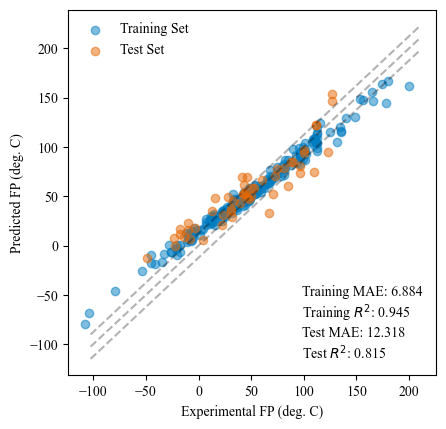

In [40]:
create_parity_plot(
    ds_fp_train.target_vals.detach().numpy(),
    pred_fp_train,
    ds_fp_test.target_vals.detach().numpy(),
    pred_fp_test,
    "figures/parity_fp.png", "FP (deg. C)"
)

<Figure size 640x480 with 0 Axes>

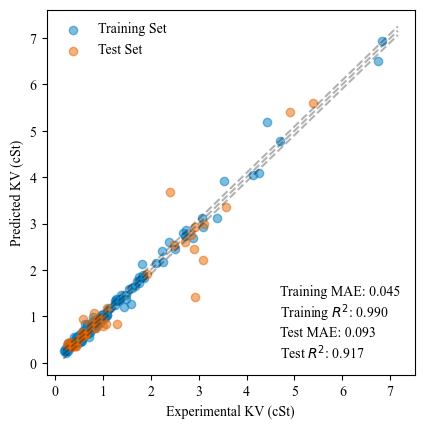

In [41]:
create_parity_plot(
    ds_kv_train.target_vals.detach().numpy(),
    pred_kv_train,
    ds_kv_test.target_vals.detach().numpy(),
    pred_kv_test,
    "figures/parity_kv.png", "KV (cSt)"
)

<Figure size 640x480 with 0 Axes>

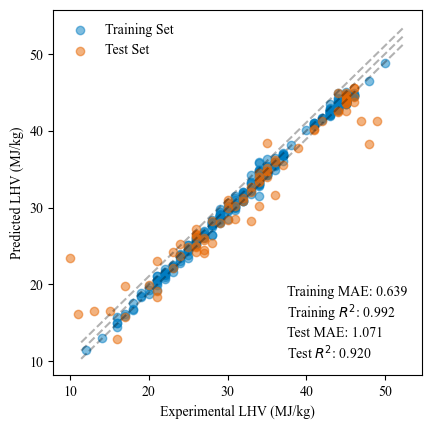

In [42]:
create_parity_plot(
    ds_lhv_train.target_vals.detach().numpy(),
    pred_lhv_train,
    ds_lhv_test.target_vals.detach().numpy(),
    pred_lhv_test,
    "figures/parity_lhv.png", "LHV (MJ/kg)"
)

<Figure size 640x480 with 0 Axes>

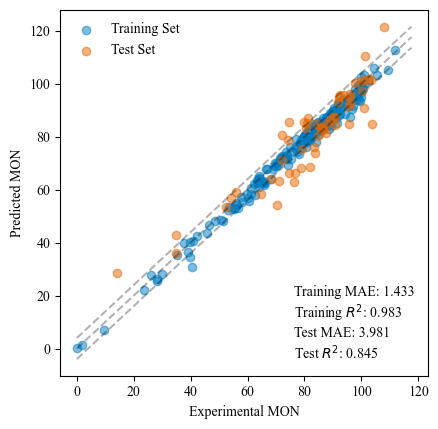

In [43]:
create_parity_plot(
    ds_mon_train.target_vals.detach().numpy(),
    pred_mon_train,
    ds_mon_test.target_vals.detach().numpy(),
    pred_mon_test,
    "figures/parity_mon.png", "MON"
)

<Figure size 640x480 with 0 Axes>

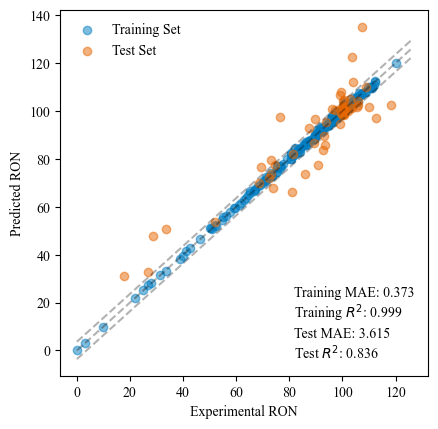

In [44]:
create_parity_plot(
    ds_ron_train.target_vals.detach().numpy(),
    pred_ron_train,
    ds_ron_test.target_vals.detach().numpy(),
    pred_ron_test,
    "figures/parity_ron.png", "RON"
)

<Figure size 640x480 with 0 Axes>

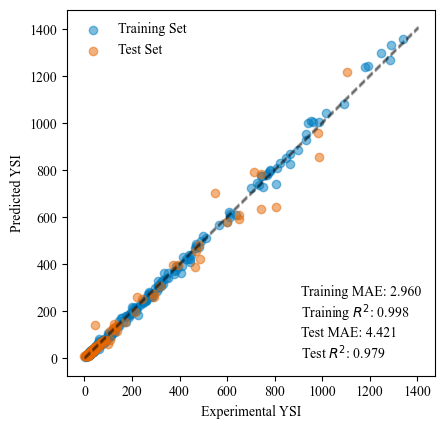

In [45]:
create_parity_plot(
    ds_ysi_train.target_vals.detach().numpy(),
    pred_ysi_train,
    ds_ysi_test.target_vals.detach().numpy(),
    pred_ysi_test,
    "figures/parity_ysi.png", "YSI"
)

<Figure size 640x480 with 0 Axes>

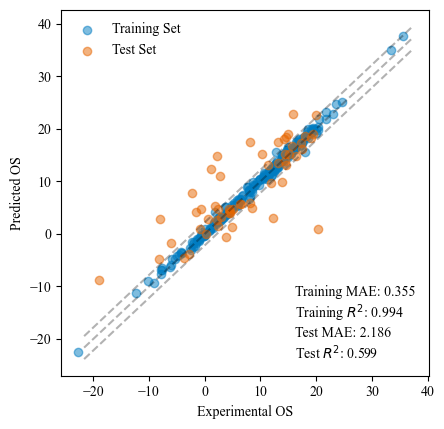

In [46]:
create_parity_plot(
    ds_os_train.target_vals.detach().numpy(),
    pred_os_train,
    ds_os_test.target_vals.detach().numpy(),
    pred_os_test,
    "figures/parity_os.png", "OS"
)